# Choosing a location for a well

## Purpose of the study and work plan

The customer is a mining company.

**A task**

We need to decide where to drill a new well. We were provided with oil samples in three regions: in each 10,000 fields, where they measured the quality of oil and the volume of its reserves. It is necessary to build a machine learning model that will help determine the region where mining will bring the greatest profit and analyze the possible profit and risks using *Bootstrap.*

Steps to choose a location:

- In the selected region, they are looking for deposits, for each, the values ​​of the signs are determined;  
- Build a model and estimate the volume of reserves;  
- Select the deposits with the highest value estimates. The number of fields depends on the company's budget and the cost of developing one well;  
- The profit is equal to the total profit of the selected deposits.  

**Conditions of the problem**

- Only linear regression is suitable for training the model (the rest are not predictable enough).  
- When exploring the region, 500 points are explored, from which, using machine learning, the best 200 are selected for development.  
- The budget for the development of wells in the region is 10 billion rubles.  
- At current prices, one barrel of raw materials brings 450 rubles of income. The income from each unit of the product is 450 thousand rubles, since the volume is indicated in thousands of barrels.  
- After assessing the risks, you need to leave only those regions in which the probability of losses is less than 2.5%. Among them, choose the region with the highest average profit.  

**Data Description**

We are provided with exploration data for three regions, which are in three different files.

*Signs:*

- id - unique identifier of the well;
- f0, f1, f2 - three signs of points (it doesn't matter what they mean, but the signs themselves are significant);

*Target feature:*

- product - the volume of reserves in the well (thousand barrels).

Synthetic data: details of contracts and characteristics of deposits were not disclosed.

**Work Plan**  

This work consists of the following steps:  

1) Loading and preparing data:  
- upload and prepare data;  
- explain the procedure.  

2) Training and validating the model for each region:  
- we will divide the data into training and validation samples in the ratio of 75:25;  
- train the models and make predictions on the validation set;  
- save predictions and correct answers on the validation set;  
- we will print on the screen the average stock of the predicted raw materials and the RMSE of the model;  
- Let's analyze the results.  

3) Preparation for profit calculation:  
- all key values for calculations will be saved in separate variables;  
- we will calculate a sufficient volume of raw materials for the break-even development of a new well. Compare the received volume of raw materials with the average stock in each region;  
- we will write conclusions on the stage of preparing the calculation of profit.  

4) Let's write a function to calculate the profit for the selected wells and model predictions:  
- select wells with maximum prediction values;  
- sum up the target value of the volume of raw materials corresponding to these predictions;  
- calculate the profit for the received volume of raw materials.  

5) Calculate the risks and profits for each region:  
- apply the Bootstrap technique with 1000 samples to find the profit distribution;  
- find the average profit, 95% confidence interval and the risk of loss. Loss is negative profit;  
- we will write conclusions: we will propose a region for well development and justify the choice;  

6) Results of the study and general conclusion.

## Loading and preparing data

### Data overview

We import all the necessary libraries for the study.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Let's load the exploration data of three regions and display the first five lines of each dataset.

In [2]:
gd_0 = pd.read_csv('geo_data_0.csv')
gd_1 = pd.read_csv('geo_data_1.csv')
gd_2 = pd.read_csv('geo_data_2.csv')

In [3]:
def show_head(df_1, df_2, df_3):
    display(df_1.head(), df_2.head(), df_3.head())

show_head(gd_0, gd_1, gd_2)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Let's display general information about dataframes.

In [4]:
print(gd_0.info())
print()
print(gd_1.info())
print()
print(gd_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column

#### Conclusions

The following conclusions can be drawn from the general data:  
1) in 3 tables with 100,000 rows and 5 columns;  
2) there are no data gaps in all columns;  
3) data types in all columns are correct;  
4) attribute `id` - a unique identifier of the well, is not important, it should be removed.

### Data preprocessing

The data does not need to handle gaps, handle duplicates.
Let's check the presence of anomalous values and the relationship of data.

#### Handling anomalous values

Consider the characteristic values of numerical data sets in the dataset.

In [5]:
display(gd_0.describe())
display(gd_1.describe())
display(gd_2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


**Conclusion:** for all features, the median is close to the mean, which indicates the absence of outliers and anomalies.

To be sure, let's look at the histogram of dataset features for the third region.

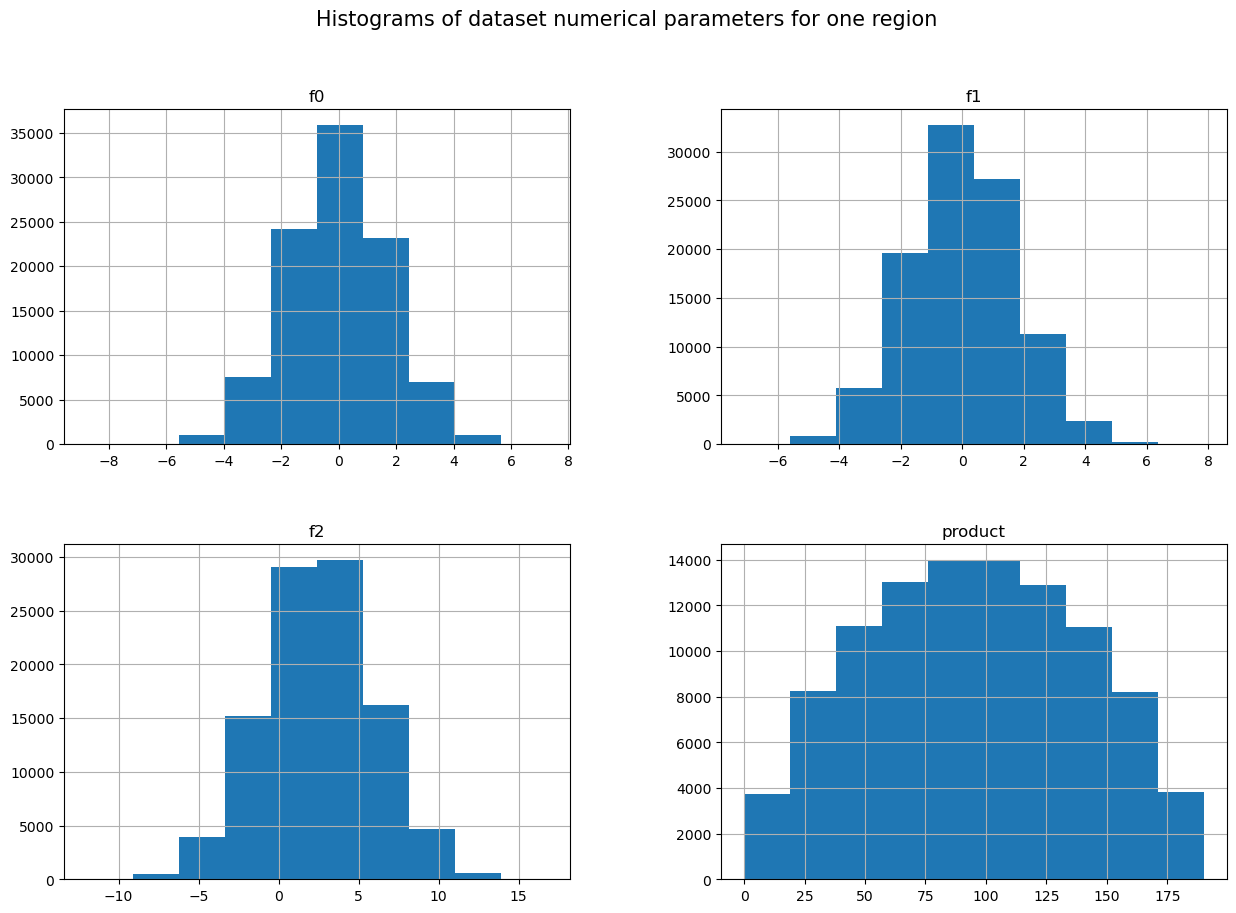

In [6]:
gd_2.hist(figsize=(15, 10))
plt.suptitle("Histograms of dataset numerical parameters for one region", fontsize=15);

#### Exploring data relationships

Let's consider the correlation between features for all dataframes in order to eliminate multicolleniarity.

1) Consider the Pearson correlation coefficient and scatterplots for the first region data.

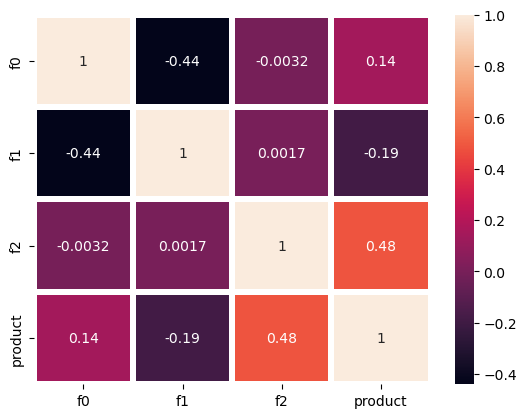

In [7]:
sns.heatmap(gd_0.corr(), annot=True, linewidths=3, linecolor='white');

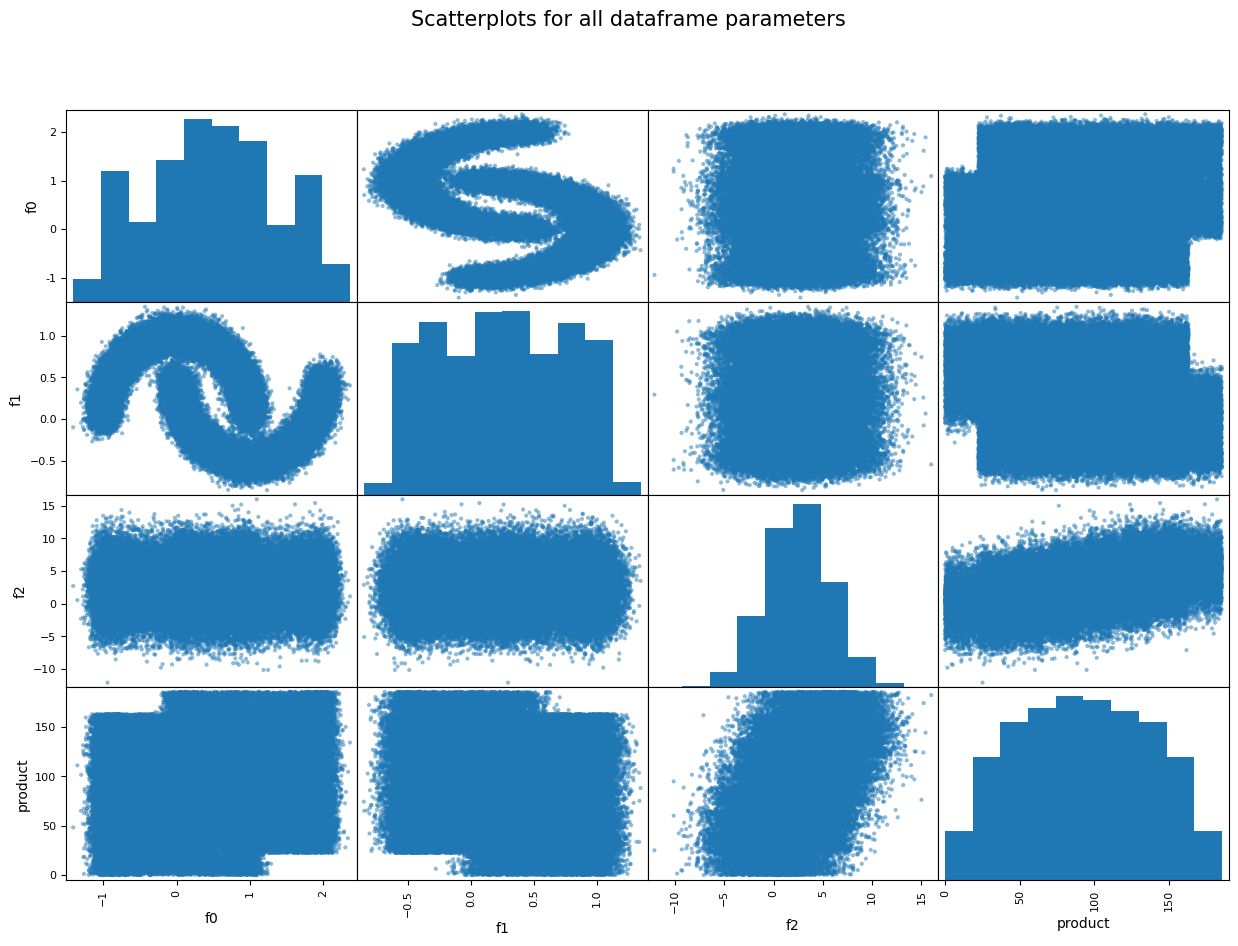

In [8]:
pd.plotting.scatter_matrix(gd_0, figsize=(15, 10))
plt.suptitle('Scatterplots for all dataframe parameters', fontsize=15);

**Conclusion:**
- the relationship between the parameters f0 and f1 is absent or has a very complex non-linear character;  
- Pearson's coefficient between the values f2 and f0, f2 and f1 is practically equal to 0, that is, with an increase in f0 and f1, the value f2 remains the same, there is no relationship between the features;  
- the relationship between product and f0 / f1 is very weak;  
- the features product and f2 have a weak linear positive relationship, Pearson's coefficient 0.48, but the relationship between the feature and the target feature is acceptable.  

2) Consider the Pearson correlation coefficient and scatterplots for the second region data.

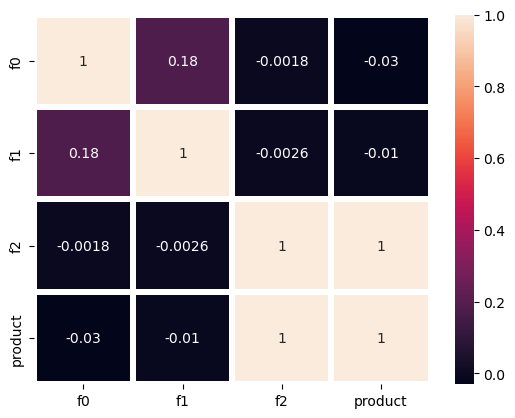

In [9]:
sns.heatmap(gd_1.corr(), annot=True, linewidths=3, linecolor='white');

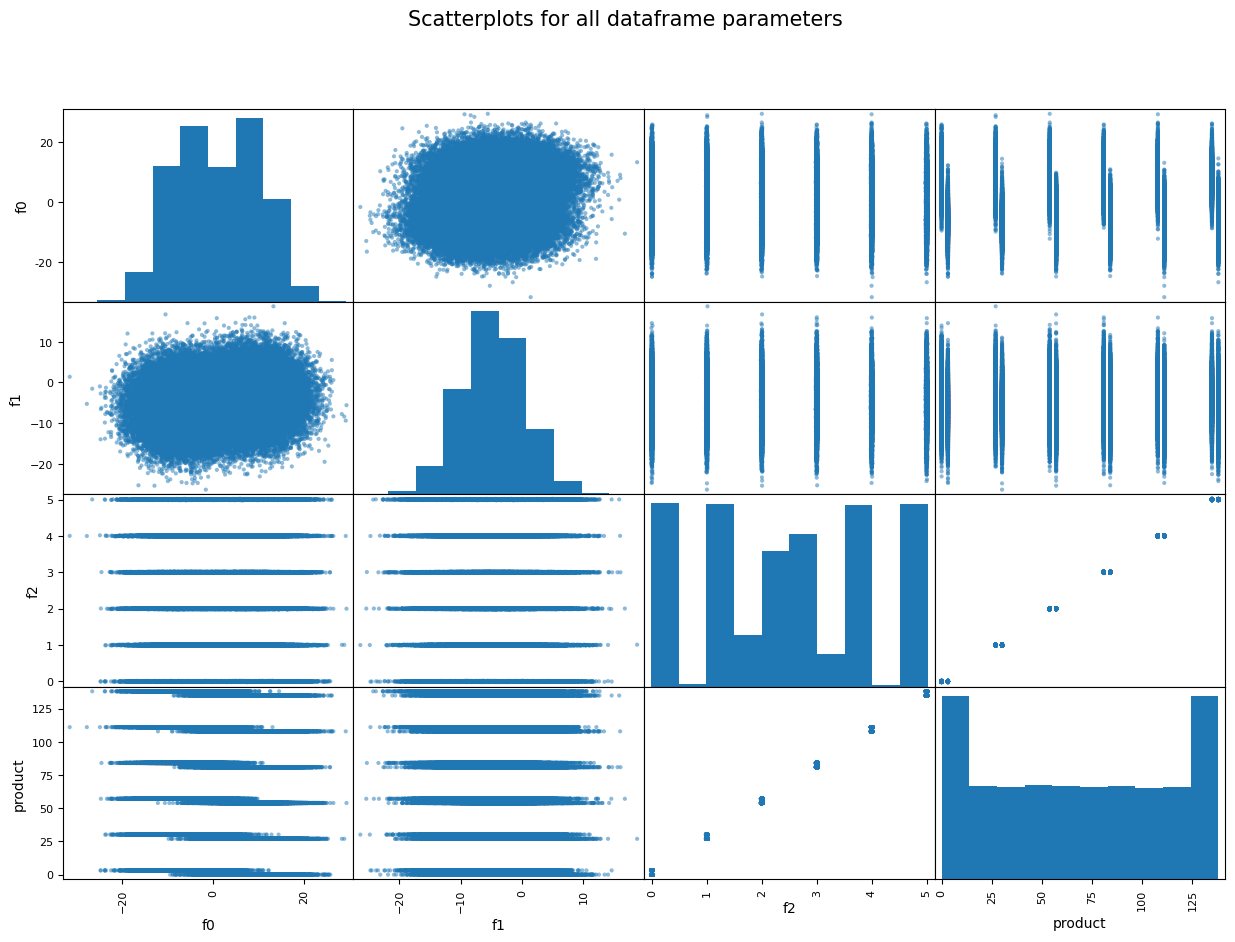

In [10]:
pd.plotting.scatter_matrix(gd_1, figsize=(15, 10))
plt.suptitle('Scatterplots for all dataframe parameters', fontsize=15);

**Conclusion:**
- there is no relationship between the parameters f0, f1, f2;
- in this region there is a direct dependence of the product on the feature f2.

3) Consider the Pearson correlation coefficient and scatterplots for the third region data.

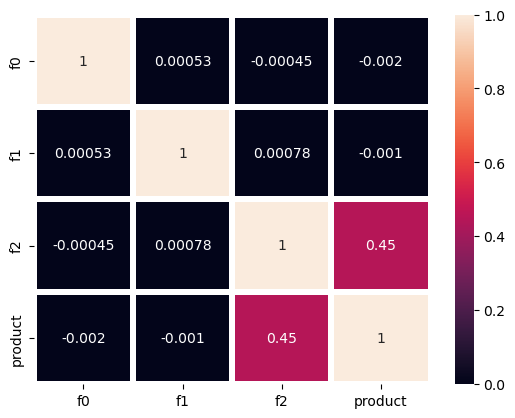

In [11]:
sns.heatmap(gd_2.corr(), annot=True, linewidths=3, linecolor='white');

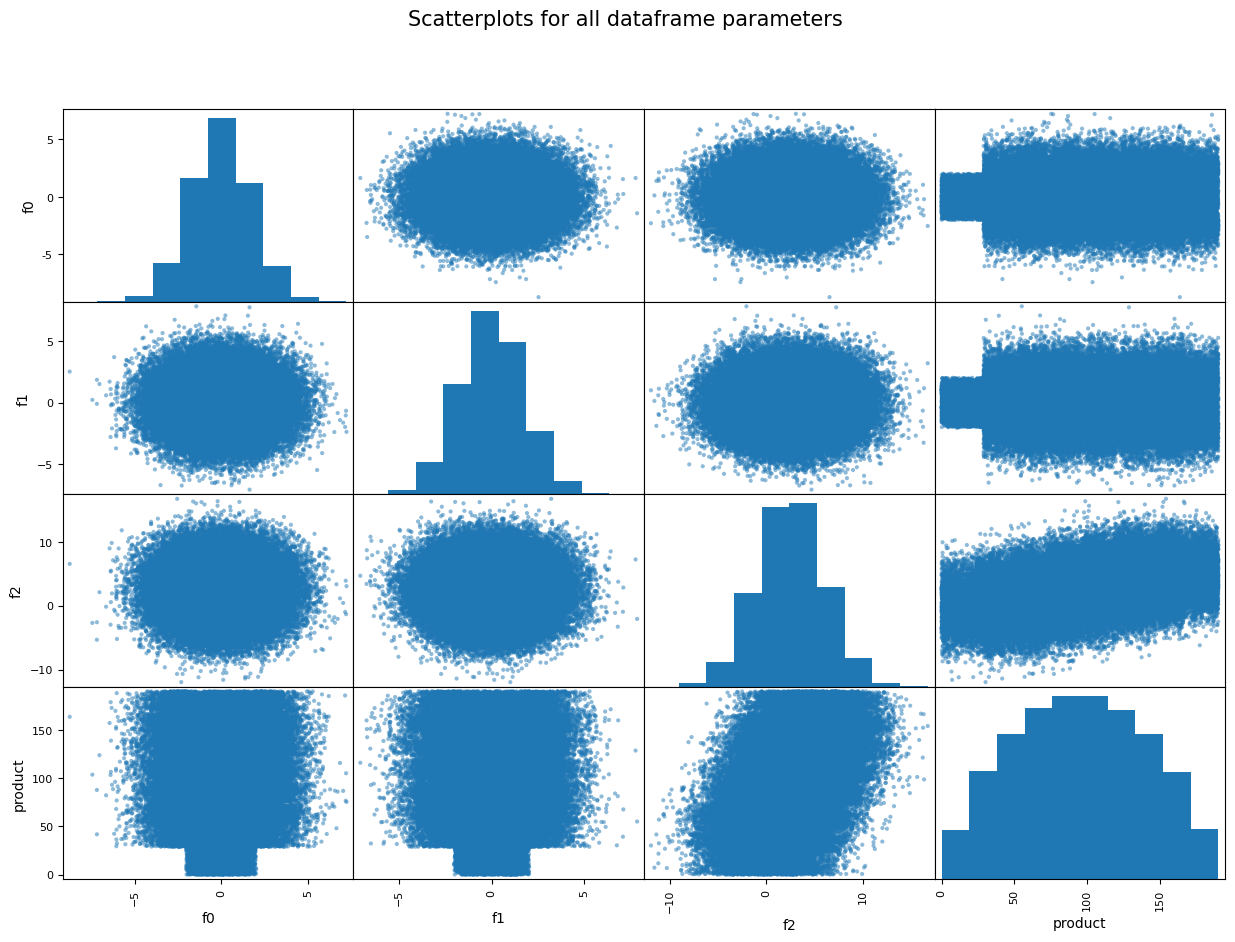

In [12]:
pd.plotting.scatter_matrix(gd_2, figsize=(15, 10))
plt.suptitle('Scatterplots for all dataframe parameters', fontsize=15);

**Conclusion:**
- there is no relationship between features f0, f1, f2;
- there is a weak linear dependence of the product on the feature f2.

**Overall conclusion on data relationship:**
1) for all regions there is no correlation of signs, there is no multicollinearity;  
2) for all regions there is a linear dependence of the volume of oil reserves on the feature f2, and for the second region there is a **direct linear dependence** of the volume of oil on the feature f2 (Pearson's correlation coefficient = 1)

### Features preparation

#### Removing insignificant features

The `id` attribute is of no use for training the model and solving the regression problem. Let's remove this column.

In [13]:
gd_0 = gd_0.drop('id', axis=1)
gd_1 = gd_1.drop('id', axis=1)
gd_2 = gd_2.drop('id', axis=1)

#### Feature scaling

We divide the samples into features and the target feature.

In [14]:
def split_features_target(df):
    return df.drop('product', axis=1), df['product']

features_gd_0, target_gd_0 = split_features_target(gd_0)
features_gd_1, target_gd_1 = split_features_target(gd_1)
features_gd_2, target_gd_2 = split_features_target(gd_2)

Let's divide the samples into training and validation samples in the ratio of 75%, 25%, respectively.

In [15]:
def split_train_valid(features, target):
    return train_test_split(features, target, test_size=0.25, random_state=12345)

features_gd_0_train, features_gd_0_valid, target_gd_0_train, target_gd_0_valid = split_train_valid(features_gd_0, target_gd_0)
features_gd_1_train, features_gd_1_valid, target_gd_1_train, target_gd_1_valid = split_train_valid(features_gd_1, target_gd_1)
features_gd_2_train, features_gd_2_valid, target_gd_2_train, target_gd_2_valid = split_train_valid(features_gd_2, target_gd_2)

In [16]:
#build a table with the dimensions of the training and validation samples and the proportions of the original data
pd.DataFrame({'Sample dimension': [features_gd_0_train.shape, features_gd_0_valid.shape],
             'Share of original data': [round(len(features_gd_0_train.index) / len(features_gd_0.index), 2), 
                                         round(len(features_gd_0_valid.index) / len(features_gd_0.index), 2)]}, 
             index=['features_gd_0_train', 'features_gd_0_valid'])

,Sample dimension,Share of original data
features_gd_0_train,"(75000, 3)",0.75
features_gd_0_valid,"(25000, 3)",0.25


Let us perform feature scaling by the data standardization method.

In [17]:
# создадим список численных признаков для масштабирования
numeric = ['f0', 'f1', 'f2']

def scaling(features_train, features_valid):
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    return features_train, features_valid

features_gd_0_train[numeric], features_gd_0_valid[numeric] = scaling(features_gd_0_train[numeric], features_gd_0_valid[numeric])
features_gd_1_train[numeric], features_gd_1_valid[numeric] = scaling(features_gd_1_train[numeric], features_gd_1_valid[numeric])
features_gd_2_train[numeric], features_gd_2_valid[numeric] = scaling(features_gd_2_train[numeric], features_gd_2_valid[numeric])

In [18]:
features_gd_0_train

,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865
70185,-1.837105,0.010321,-0.147634
82230,-1.299243,0.987558,1.273181
...,...,...,...
4094,1.567114,-1.087243,-0.272211
85412,-1.904207,-0.525360,1.327530
2177,0.418949,-1.296788,-0.196407
77285,0.400077,-1.466874,-0.445317


### Conclusion

We loaded and prepared the exploration data of three regions, checked the data for gaps and anomalous values, looked at the data relationships, removed the `id` attribute, which is insignificant for solving the regression problem, divided the samples into training and validation ones, and performed feature scaling.

## Train and validate the model

We will train a linear regression model on the exploration data of three regions and make predictions on the validation set.
Store the predictions and correct answers on the validation set. We will print on the screen the average stock of the predicted raw materials and the RMSE model for each region.

In [19]:
# write a function that trains the model on the training set, makes predictions on the validation set, and
# returns predictions and RMSE metric
def make_predictions(features_train, target_train, features_valid, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions_valid) ** 0.5
    return pd.Series(predictions_valid, index=features_valid.index), rmse

predictions_gd_0_valid, gd_0_rmse = make_predictions(features_gd_0_train, target_gd_0_train, features_gd_0_valid, target_gd_0_valid)
predictions_gd_1_valid, gd_1_rmse = make_predictions(features_gd_1_train, target_gd_1_train, features_gd_1_valid, target_gd_1_valid)
predictions_gd_2_valid, gd_2_rmse = make_predictions(features_gd_2_train, target_gd_2_train, features_gd_2_valid, target_gd_2_valid)

pd.DataFrame({'The true value of the average stock of raw materials for the region': [round(gd_0['product'].mean(), 2), 
                                                                                      round(gd_1['product'].mean(), 2), 
                                                                                      round(gd_2['product'].mean(), 2)],
              'Average stock of predicted raw materials for the region': [round(predictions_gd_0_valid.mean(), 2), 
                                                                          round(predictions_gd_1_valid.mean(), 2), 
                                                                          round(predictions_gd_2_valid.mean(), 2)],
              'RMSE models': [gd_0_rmse.round(2), gd_1_rmse.round(2), gd_2_rmse.round(2)]})

,The true value of the average stock of raw materials for the region,Average stock of predicted raw materials for the region,RMSE models
0,92.50,92.59,37.58
1,68.83,68.73,0.89
2,95.00,94.97,40.03


### Conclusion

1) the linear regression model predicts close to true values for the data of all three regions;  
2) the model predicts best on the data of geological exploration of the second region, since the volume of oil there directly depends on the sign f2, the quality of the model on the data of the first and third regions is approximately the same.

## Preparation for profit calculation

All key values for calculations will be saved in separate variables

In [20]:
explore_count = 500 # number of points for research
mining_count = 200 # number of points to develop
mining_budget = 10_000 # the budget for the development of wells in the region in million rubles.
revenue_per_barrel = 0.45 # income from 1 thousand barrels to million rubles
alpha = 0.025 # maximum loss probability
bootstrap_samples = 1000

Calculate the minimum average amount of the product in the fields of the region, sufficient for break-even development

In [21]:
# development costs per well
budget_per_bore = mining_budget / mining_count

# sufficient volume of raw materials for break-even development of a new well
sufficient_product_volume = budget_per_bore / revenue_per_barrel
print('Sufficient volume of raw materials for break-even development of 1 well, thousand barrels {:.2f}'
      .format(sufficient_product_volume))

Sufficient volume of raw materials for break-even development of 1 well, thousand barrels 111.11


**Conclusion:**
The received volume of raw materials exceeds the average volume of stocks in each region. If you choose to develop a well randomly, there is a risk that the investment will not pay off. Using a machine learning model, we predicted the volume of reserves in the well based on known features. Next, we select the wells with the maximum prediction values and calculate the profit.

## Calculation of profit and risks

### Profit calculation for 200 wells with maximum reserves based on model predictions

Let's write a function to calculate profit for selected wells and model predictions.

In [22]:
def get_income(target_valid, predictions_valid, mining_count):
    
    # sorting wells
    predict_sorted = predictions_valid.sort_values(ascending=False)
    
    # determine the true values for the selected wells and take the number of mining_count
    top_target = target_valid[predict_sorted.index][:mining_count]
    
    # sum the target value of the volume of raw materials corresponding to these predictions and
    # calculate the profit for the received volume of raw materials
    income = top_target.sum() * revenue_per_barrel - mining_budget
    
    return income

Calculate the profit for each region:

In [23]:
print('The profit of 200 wells selected according to the predictions of the model will be:')
print('for region 0 - {:.3f} million rubles'.format(get_income(target_gd_0_valid, predictions_gd_0_valid, mining_count)))
print('for region 1 - {:.3f} million rubles'.format(get_income(target_gd_1_valid, predictions_gd_1_valid, mining_count)))
print('for region 2 - {:.3f} million rubles'.format(get_income(target_gd_2_valid, predictions_gd_2_valid, mining_count)))

The profit of 200 wells selected according to the predictions of the model will be:
for region 0 - 3320.826 million rubles
for region 1 - 2415.087 million rubles
for region 2 - 2710.350 million rubles


**Conclusion:** we got high profit values for each region, but on the condition that we carry out geological exploration at 25,000 points. According to the customer's condition, 500 points are explored during the exploration of the region, from which, using machine learning, the best 200 are selected for development. Let's calculate the risks and profits if we conduct geological exploration using 500 random points.

### Calculation of risks and profits for each region (for 500 random wells)

Let's evaluate the risks and leave only those regions in which the probability of losses is less than 2.5%.

Let's use the Bootstrap technique with 1000 samples to find the profit distribution.

In [24]:
def get_income_distribution(predictions_valid, target_valid, bootstrap_samples, explore_count):
    state = np.random.RandomState(12345)
    count = 0 # counter for calculating the probability of losses in the region
    values = [] # profit values
    for i in range(1000):
        
        # create a subsample of 500 objects of the target attribute of the validation sample
        target_subsample = target_valid.sample(explore_count, replace=True, random_state=state)
        
        # select rows from the predictions corresponding to the selected rows in the target feature
        predict_subsample = predictions_valid[target_subsample.index]
        
        # calculate the profit for the required number of wells and add it to the values array
        income = get_income(target_subsample, predict_subsample, mining_count)
        values.append(income)
        
        # check if the sample is unprofitable, if it is, then increase the counter
        if income < 0:
            count +=1
            
    values = pd.Series(values)
        
    # find and display the average profit for the region
    print('Average profit:', values.mean(), 'million rubles')
        
    # find and display the 95% confidence interval
    confidence_interval = st.t.interval(0.95, df=len(values)-1, loc=values.mean(), scale=np.std(values, ddof=1))
    print('95% confidence interval:', confidence_interval)
        
    # calculate the probability of loss
    pvalue = 1. * count / bootstrap_samples
    if pvalue < alpha:
        print("The probability of loss is {:.2%} and is less than acceptable, the region is suitable for well development".format(pvalue))
    else:
        print("The probability of loss is {:.2%} and is more than acceptable, the region is not suitable for well development".format(pvalue)) 

Let's display the average profit, 95% confidence interval and probability of loss for each region.

In [25]:
print('First region:')
get_income_distribution(predictions_gd_0_valid, target_gd_0_valid, bootstrap_samples, explore_count)

First region:
Average profit: 425.9385269105923 million rubles
95% confidence interval: (-118.17308158673342, 970.0501354079181)
The probability of loss is 6.00% and is more than acceptable, the region is not suitable for well development


In [26]:
print('Second region:')
get_income_distribution(predictions_gd_1_valid, target_gd_1_valid, bootstrap_samples, explore_count)

Second region:
Average profit: 515.2227734432905 million rubles
95% confidence interval: (85.1119884768645, 945.3335584097165)
The probability of loss is 1.00% and is less than acceptable, the region is suitable for well development


In [27]:
print('Third region:')
get_income_distribution(predictions_gd_2_valid, target_gd_2_valid, bootstrap_samples, explore_count)

Third region:
Average profit: 435.0083627827561 million rubles
95% confidence interval: (-120.12349557730522, 990.1402211428174)
The probability of loss is 6.40% and is more than acceptable, the region is not suitable for well development


### Conclusion

The best region for well development is the 2nd region, as it has the lowest probability of 1% to get a loss and the highest average profit, which with a 95% probability falls into the range with positive boundaries. Regions 1 and 3 have a probability of loss above the criterion set by the customer.

## Results of the study and general conclusion

In this work, a machine learning model was built that helps a mining company determine the region where to drill a new well so that production brings the greatest profit. The customer provided geological exploration data of three regions. We have loaded and prepared data to train a linear regression model that predicts oil reserves from exploration data. Based on the predictions of the model using the Bootstrap technique, confidence intervals were calculated for the average profit from 200 wells with the maximum reserves for each region, provided that only 500 random wells are explored in the exploration of the region. The risks of receiving a loss were also assessed according to the criterion of the customer. Based on the data received, the customer was offered a region for production with the minimum risk of loss and the highest average profit, which with a 95% probability falls into the range with positive boundaries.

It should be noted that the quality of the model on the data of the second region turned out to be much higher than the quality could be on the data of regions 1 and 3. This is due to the quality of the data themselves. Since the value of the features is not disclosed by the customer, the customer is advised to double-check the correctness and quality of the data, paying special attention to feature f2.